In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
%matplotlib inline

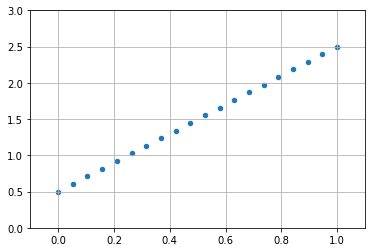

In [4]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.scatter(x, y, s=20)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()



In [5]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

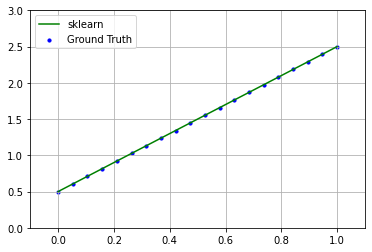

In [8]:
yhat = lr.predict(x.reshape(-1, 1))
plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [9]:
lr.coef_

array([2.])

In [10]:
lr.intercept_

0.5000000000000003

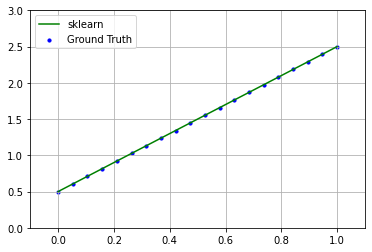

In [11]:
yhat = np.dot(x.reshape(-1, 1), lr.coef_) + lr.intercept_

plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

## **Exercise**: Pick a random slope and intercept; and draw a line. Find the correct slope and intercept with sklearn.

In [ ]:
# enter code here

# Multiple Regression with sklearn

In [12]:
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
y = boston.target
X = boston.data
lr.fit(X, y)

LinearRegression()

In [18]:
yhat = lr.predict(X)

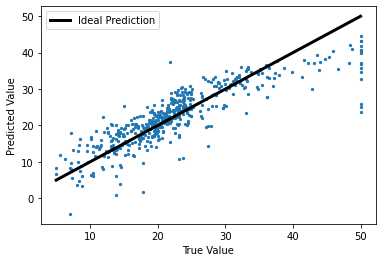

In [19]:
plt.scatter(y, yhat, s=5)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', linewidth=3, label='Ideal Prediction')
plt.legend()

## Measuring Error

In [20]:
mean_squared_error(y, yhat)

21.894831181729202

In [21]:
r2_score(y, yhat)

0.7406426641094095

## Importance of individual features

<AxesSubplot:>

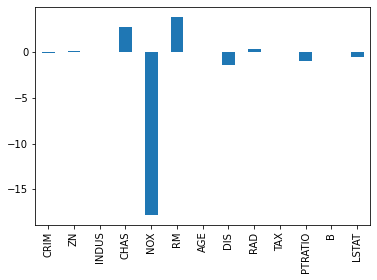

In [22]:
f_imp = pd.Series(lr.coef_, index=boston.feature_names)
f_imp.plot(kind='bar')

## Exercise: How do we interpret this?

In [23]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

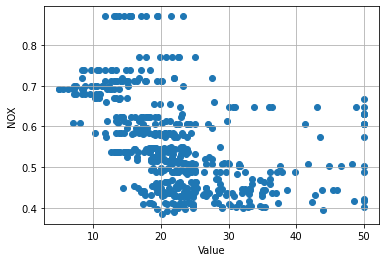

In [25]:
plt.scatter(y, df['NOX'].values)
plt.xlabel('Value')
plt.ylabel('NOX')
plt.grid()

In [26]:
nox = df['NOX'].values
y = df['value'].values
lr.fit(nox.reshape(-1, 1), y)
yhat = lr.predict(nox.reshape(-1, 1))

r2_score(y, yhat)

0.182603042501699

In [27]:
lr.coef_

array([-33.91605501])

## Cumumlative feature variances

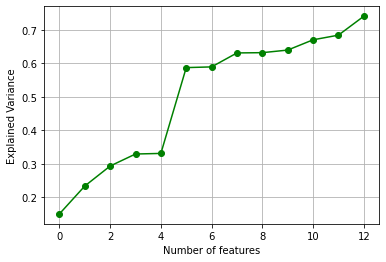

In [28]:
y = boston.target
X = boston.data
variances = []
for i in range(X.shape[1]):
    xx = X[:, :(i + 1)]
    lr.fit(xx, y)
    variances.append(explained_variance_score(y, lr.predict(X[:, :(i + 1)])))

plt.plot(variances, 'go-')
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.grid()

## **Exercise**
### Use the Diabetes dataset (provided below) to fit a linear regression model.
### Rank the features in order of _decreasing_ importance.

In [29]:
diabetest = data.load_diabetes()

In [30]:
df = diabetest

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59